# TEST

Dummy notebook to test functions

In [1]:
import nbimporter
import prepData as prep
import fitFunc as fits
import Statistics as stat

import matplotlib.pyplot as plt
import numpy as np 

/home/edi/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Test prepData

Import data from example run and prepare it for further analysis.

In [2]:
data,center,length = prep.load_dataset(395)
freq, fft, weights, ref, N = prep.prep_data(data,center, length=length)

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


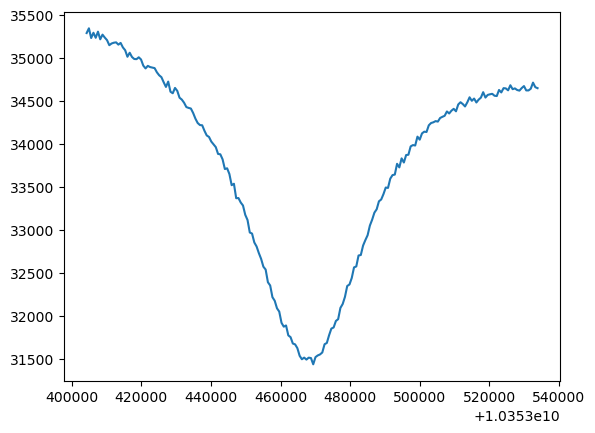

In [3]:
plt.plot(freq, fft)

## Test Fits

### Background Fit

First fit background and check the distribution of residuals.

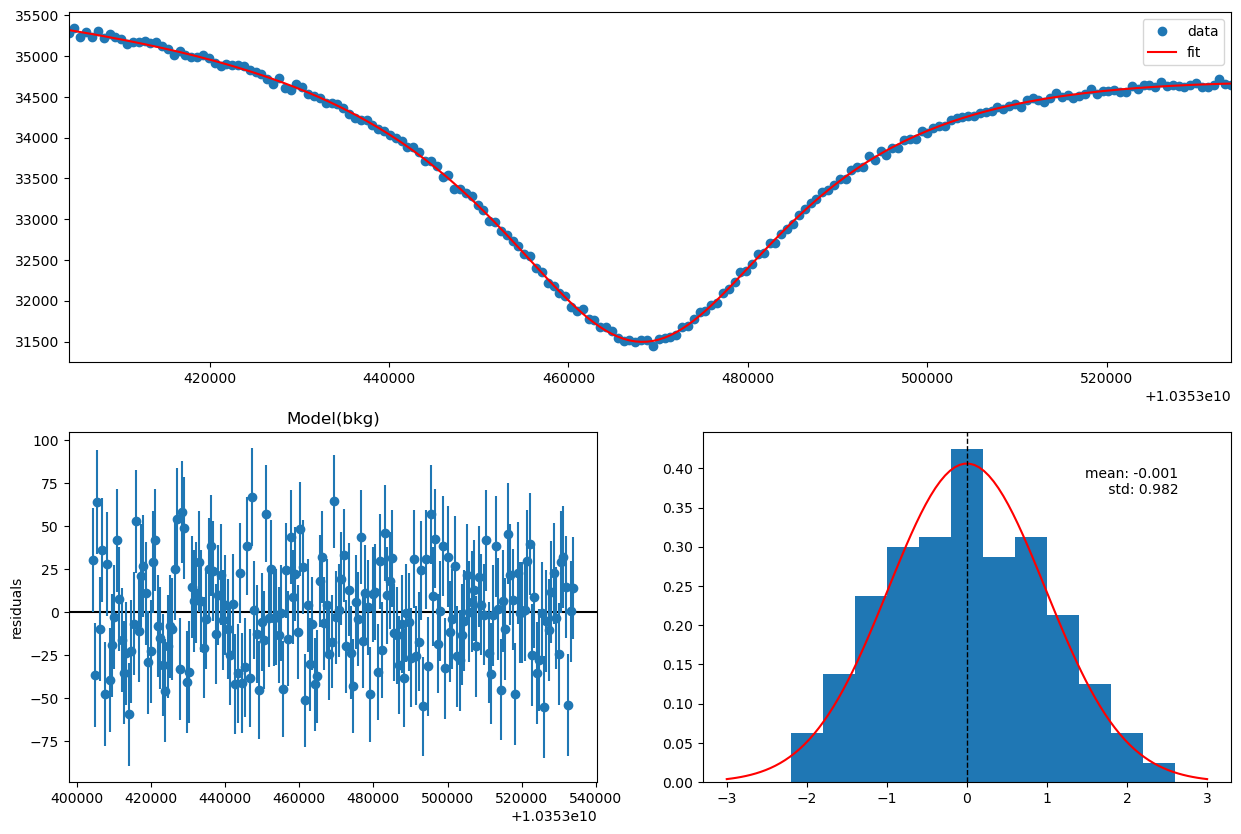

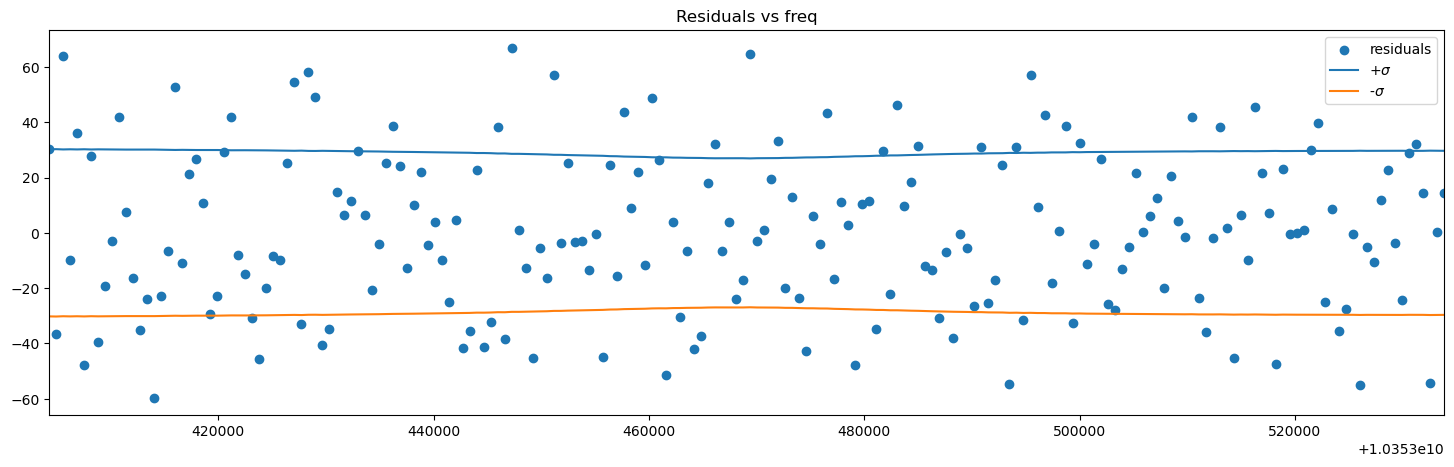

In [4]:
res_bkg = fits.fit_bkg(freq, fft, weights, center, ref)
fits.plot_fit(freq, fft, weights, res_bkg)

### Signal FIt

Fit signal function using every possible frequency as the centre of the signal and check the values of $\mu$ obtained. 

In [5]:
bkg_params = res_bkg.best_values

mu_fit = np.empty(len(freq))
for i in range(len(freq)):
    res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=freq[i],
                           init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
    mu_fit[i] = res_sig.best_values["mu"]

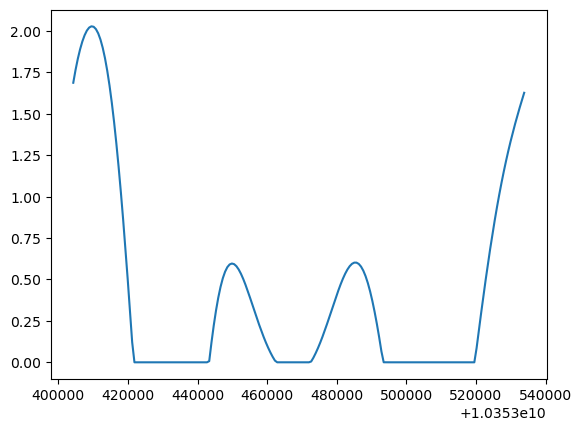

In [6]:
plt.plot(freq, mu_fit)

Check fit results for maximum $\mu$ obtained.

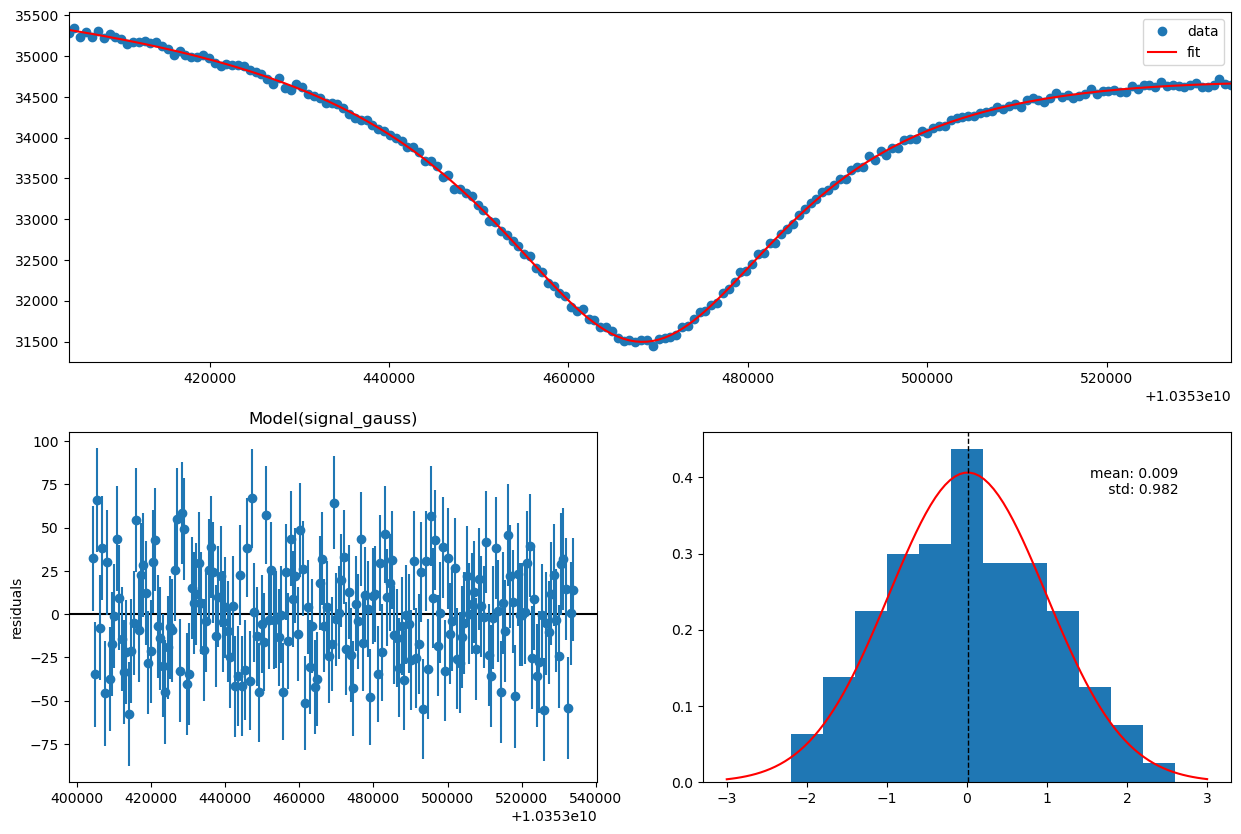

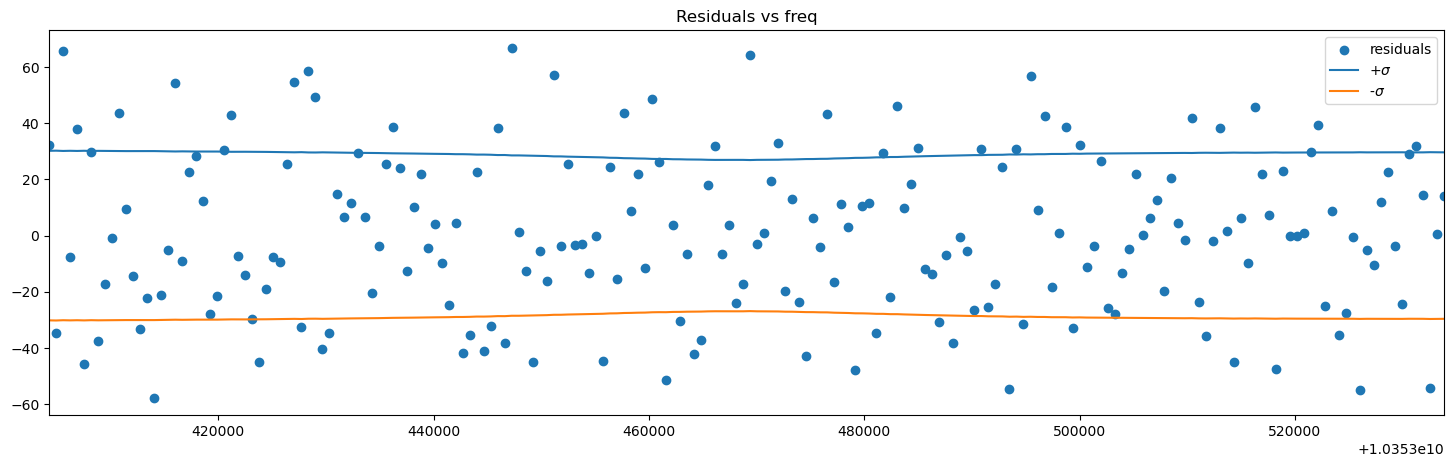

In [7]:
x0_max = freq[np.argmax(mu_fit)]

res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
fits.plot_fit(freq, fft, weights, res_sig)

If you let every parameter vary, the fit does not converge for $\mu$ and it gets stuck on the starting value.

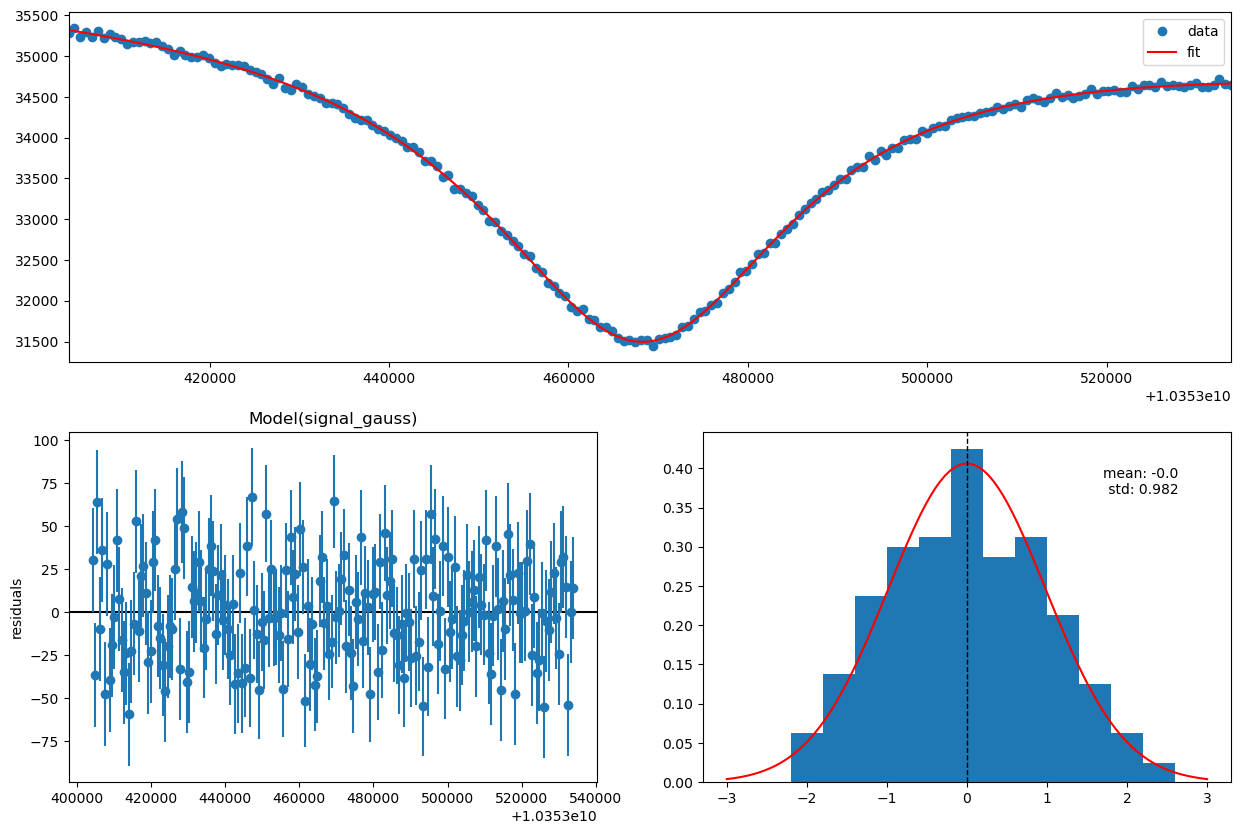

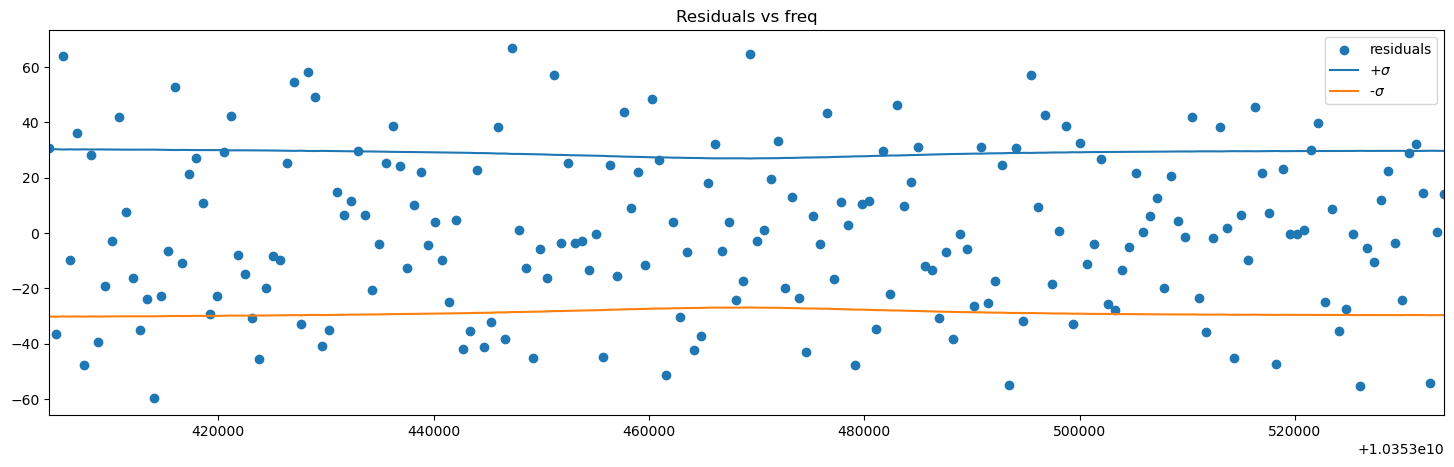

In [8]:
res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=True, mu_init=0.1)
fits.plot_fit(freq, fft, weights, res_sig)

## Test Statistics

Compute likelihood ratio over observed data.

In [9]:
q0_obs = stat.lh_ratio(fft, res_bkg.best_fit, res_sig.best_fit)
q0_obs

0.010000322994528688

### Significance

Compute significance as a function of the center of the signal.

In [10]:
z_tot, _ = stat.stat_test(run=395, x_0=freq, mu_fix=np.array([]),
                          signal=fits.signal_gauss, n_toy=500,
                          calc_z=True, calc_CI=False, draw=False, verbose=False, path='db/')

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Step: 20
Step: 40
Step: 60
Step: 80
Step: 100
Step: 120
Step: 140
Step: 160
Step: 180
Step: 200


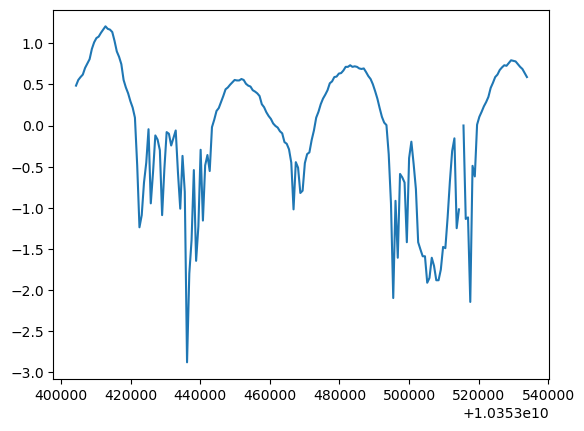

In [11]:
plt.plot(freq, z_tot)

In [12]:
np.max(z_tot), freq[np.argmax(z_tot)]

(1.205526795972518, 10353412760.416666)

Here are some example of the likelihood ratio distribution for different $x_0$: the maximum value of $\hat{\mu}$, the center of the cavity and a secondary peak of $\hat{\mu}$.

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


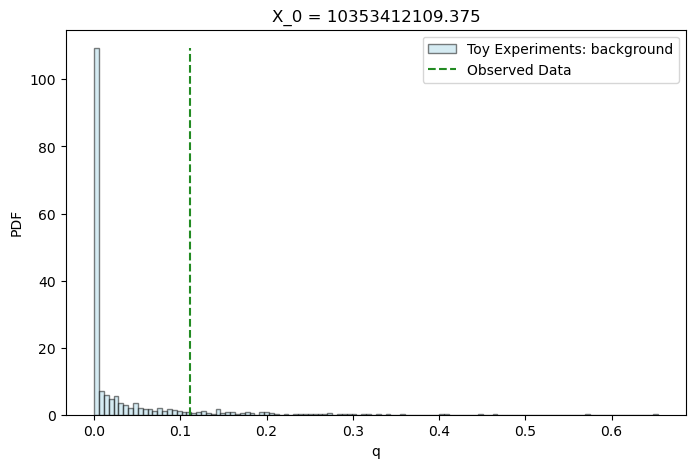

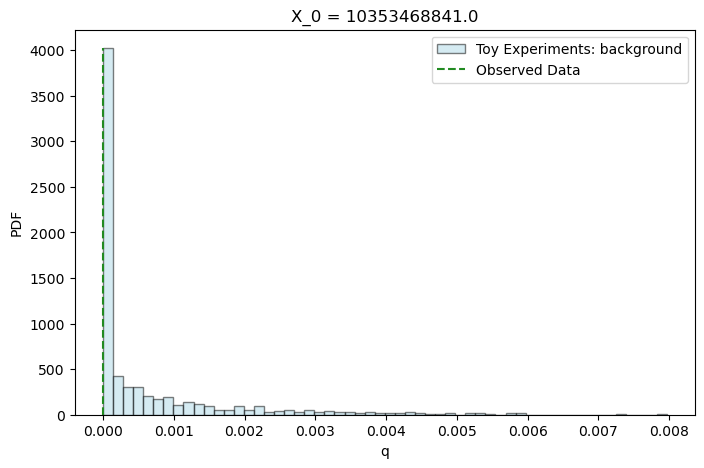

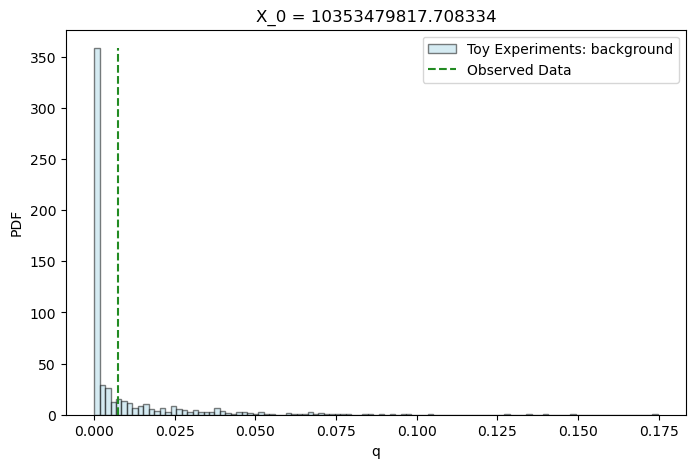

In [13]:
z, _ = stat.stat_test(run=395, x_0=[10353412109.375, center, freq[116]], mu_fix=np.array([]),
                      signal=fits.signal_gauss, n_toy=1000,
                      calc_z=True, calc_CI=False, draw=True, verbose=False, path='db/')

In [14]:
z

array([ 1.27587418, -0.92685851,  0.64026551])

### Confidence Interval

Compute $\mu^{95\% CL}$ for the frequency where we have the maximum of $\hat{\mu}$.

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Mu:  80    q(mu)_obs = 218.56306529839276 
p_mu = 0.0   p_b = 0.256   ratio = 0.0 

Mu:  65    q(mu)_obs = 145.32108354222646 
p_mu = 0.0   p_b = 0.256   ratio = 0.0 

Mu:  50    q(mu)_obs = 86.93341443205122 
p_mu = 0.0   p_b = 0.256   ratio = 0.0 

Mu:  35    q(mu)_obs = 43.43202615703558 
p_mu = 0.001   p_b = 0.256   ratio = 0.00390625 

Mu:  20    q(mu)_obs = 14.84895983762135 
p_mu = 0.02   p_b = 0.256   ratio = 0.078125 



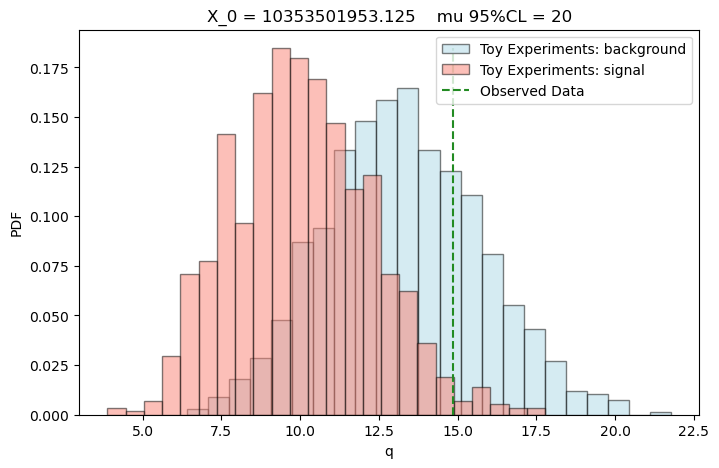

Mu:  80    q(mu)_obs = 218.01912519048528 
p_mu = 0.0   p_b = 0.252   ratio = 0.0 

Mu:  65    q(mu)_obs = 145.1254531157506 
p_mu = 0.0   p_b = 0.252   ratio = 0.0 

Mu:  50    q(mu)_obs = 86.97279773586138 
p_mu = 0.0   p_b = 0.252   ratio = 0.0 

Mu:  35    q(mu)_obs = 43.5927762874112 
p_mu = 0.001   p_b = 0.252   ratio = 0.003968253968253968 

Mu:  20    q(mu)_obs = 15.017077892162206 
p_mu = 0.014   p_b = 0.253   ratio = 0.05533596837944664 



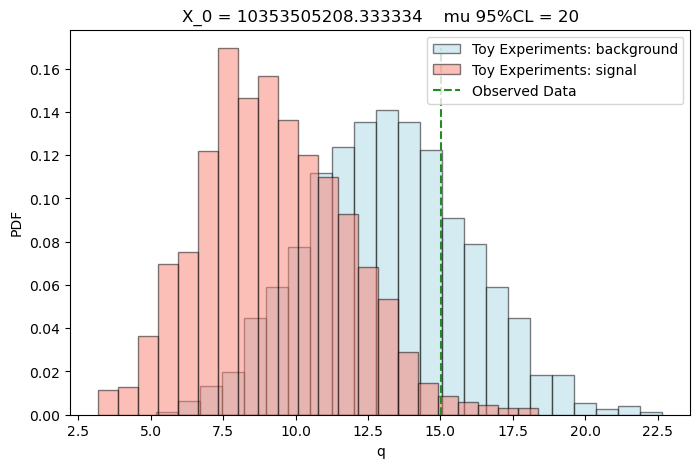

Mu:  80    q(mu)_obs = 216.59102083484777 
p_mu = 0.0   p_b = 0.279   ratio = 0.0 

Mu:  65    q(mu)_obs = 144.16655349811072 
p_mu = 0.0   p_b = 0.279   ratio = 0.0 

Mu:  50    q(mu)_obs = 86.39044283785029 
p_mu = 0.0   p_b = 0.28   ratio = 0.0 

Mu:  35    q(mu)_obs = 43.2940275191761 
p_mu = 0.0   p_b = 0.28   ratio = 0.0 

Mu:  20    q(mu)_obs = 14.908717265093628 
p_mu = 0.01   p_b = 0.28   ratio = 0.03571428571428571 



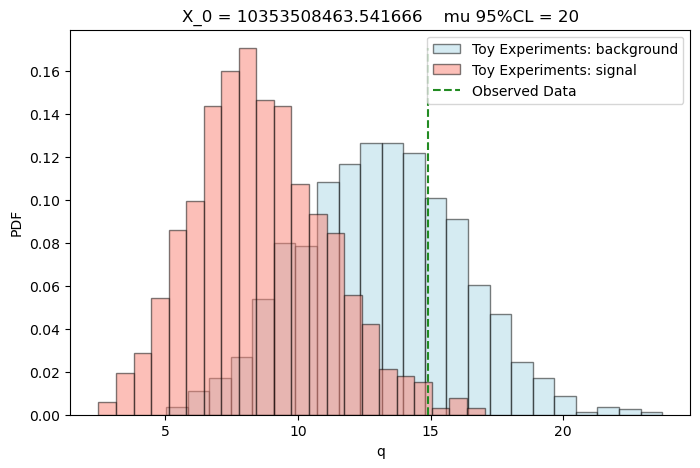

Mu:  80    q(mu)_obs = 214.14191273703545 
p_mu = 0.0   p_b = 0.327   ratio = 0.0 

Mu:  65    q(mu)_obs = 142.3595918054957 
p_mu = 0.0   p_b = 0.327   ratio = 0.0 

Mu:  50    q(mu)_obs = 85.1414422441037 
p_mu = 0.0   p_b = 0.327   ratio = 0.0 

Mu:  35    q(mu)_obs = 42.51857998192918 
p_mu = 0.0   p_b = 0.327   ratio = 0.0 

Mu:  20    q(mu)_obs = 14.522191353016524 
p_mu = 0.017   p_b = 0.328   ratio = 0.05182926829268293 



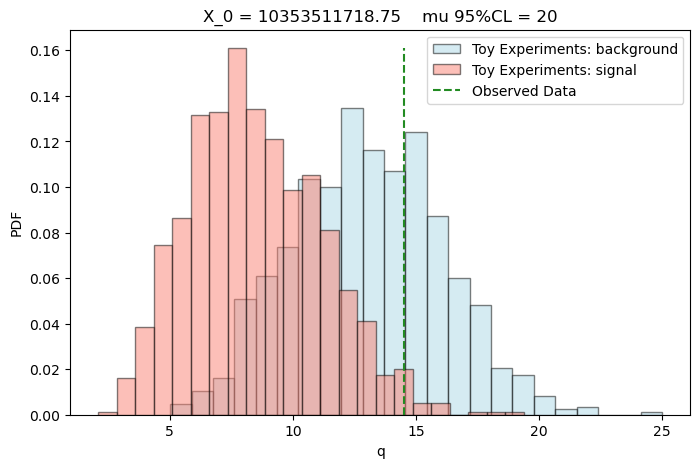

Mu:  80    q(mu)_obs = 210.47069410483664 
p_mu = 0.0   p_b = 0.353   ratio = 0.0 

Mu:  65    q(mu)_obs = 139.604799037578 
p_mu = 0.0   p_b = 0.353   ratio = 0.0 

Mu:  50    q(mu)_obs = 83.19802403642393 
p_mu = 0.0   p_b = 0.353   ratio = 0.0 

Mu:  35    q(mu)_obs = 41.28129372145236 
p_mu = 0.002   p_b = 0.353   ratio = 0.0056657223796034 

Mu:  20    q(mu)_obs = 13.885602598903915 
p_mu = 0.035   p_b = 0.353   ratio = 0.0991501416430595 



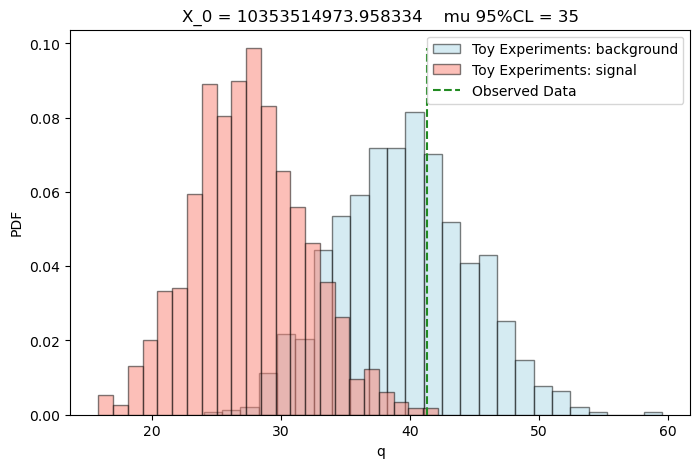

Mu:  80    q(mu)_obs = 204.96823239873356 
p_mu = 0.0   p_b = 0.433   ratio = 0.0 

Mu:  65    q(mu)_obs = 135.55994869023993 
p_mu = 0.0   p_b = 0.433   ratio = 0.0 

Mu:  50    q(mu)_obs = 80.41447643161678 
p_mu = 0.0   p_b = 0.433   ratio = 0.0 

Mu:  35    q(mu)_obs = 39.56250607946504 
p_mu = 0.008   p_b = 0.433   ratio = 0.018475750577367205 

Mu:  20    q(mu)_obs = 13.034797513429794 
p_mu = 0.065   p_b = 0.433   ratio = 0.15011547344110854 



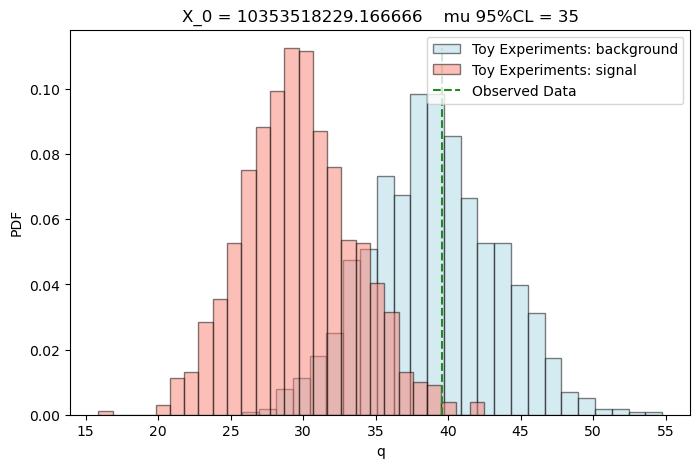

Mu:  80    q(mu)_obs = 196.21045189462552 
p_mu = 0.0   p_b = 0.564   ratio = 0.0 

Mu:  65    q(mu)_obs = 129.36800179219244 
p_mu = 0.0   p_b = 0.564   ratio = 0.0 

Mu:  50    q(mu)_obs = 76.36289107683865 
p_mu = 0.006   p_b = 0.564   ratio = 0.010638297872340427 

Mu:  35    q(mu)_obs = 37.225299549634656 
p_mu = 0.043   p_b = 0.564   ratio = 0.07624113475177305 

Mu:  20    q(mu)_obs = 11.985475702798567 
p_mu = 0.195   p_b = 0.564   ratio = 0.34574468085106386 



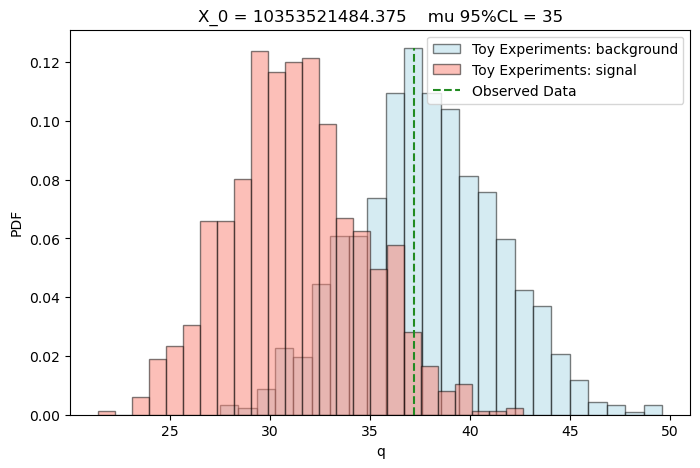

Mu:  80    q(mu)_obs = 181.91094369889856 
p_mu = 0.002   p_b = 0.708   ratio = 0.0028248587570621473 

Mu:  65    q(mu)_obs = 119.60720001003983 
p_mu = 0.007   p_b = 0.709   ratio = 0.009873060648801129 

Mu:  50    q(mu)_obs = 70.28630774092585 
p_mu = 0.044   p_b = 0.709   ratio = 0.06205923836389281 

Mu:  35    q(mu)_obs = 33.97712221795541 
p_mu = 0.12   p_b = 0.709   ratio = 0.16925246826516221 

Mu:  20    q(mu)_obs = 10.708565341161147 
p_mu = 0.335   p_b = 0.709   ratio = 0.4724964739069112 



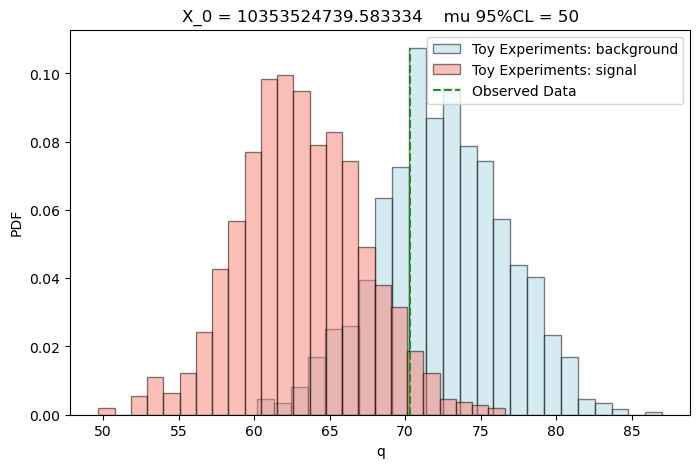

Mu:  80    q(mu)_obs = 159.85144680295048 
p_mu = 0.001   p_b = 0.757   ratio = 0.001321003963011889 

Mu:  65    q(mu)_obs = 104.86790766395416 
p_mu = 0.018   p_b = 0.757   ratio = 0.023778071334214 

Mu:  50    q(mu)_obs = 61.402417124600106 
p_mu = 0.064   p_b = 0.757   ratio = 0.0845442536327609 

Mu:  35    q(mu)_obs = 29.480916001912647 
p_mu = 0.203   p_b = 0.758   ratio = 0.2678100263852243 

Mu:  20    q(mu)_obs = 9.12940585186675 
p_mu = 0.427   p_b = 0.758   ratio = 0.5633245382585752 



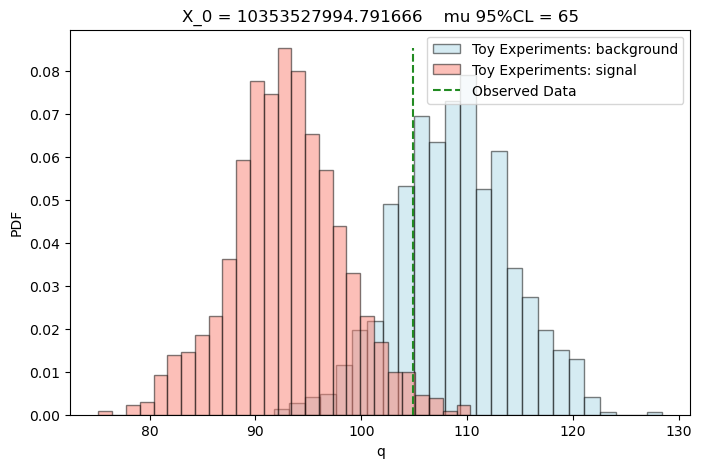

Mu:  80    q(mu)_obs = 129.81823464836043 
p_mu = 0.0   p_b = 0.756   ratio = 0.0 

Mu:  65    q(mu)_obs = 85.01681529793086 
p_mu = 0.006   p_b = 0.756   ratio = 0.007936507936507936 

Mu:  50    q(mu)_obs = 49.639384610378556 
p_mu = 0.041   p_b = 0.755   ratio = 0.054304635761589407 

Mu:  35    q(mu)_obs = 23.706928364367513 
p_mu = 0.156   p_b = 0.755   ratio = 0.20662251655629138 

Mu:  20    q(mu)_obs = 7.24048134345685 
p_mu = 0.379   p_b = 0.756   ratio = 0.5013227513227513 



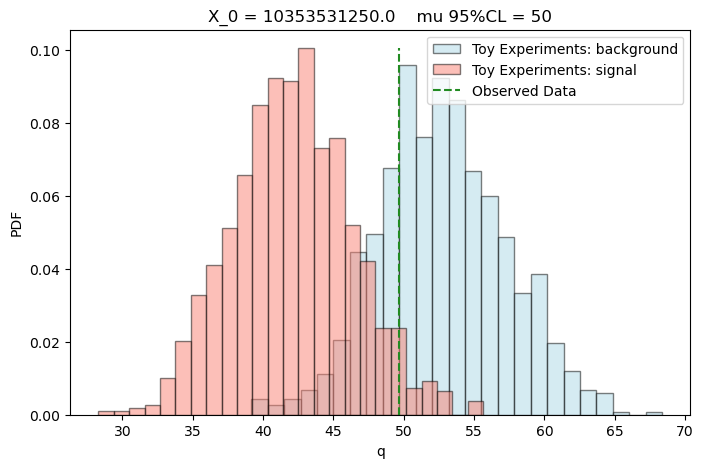

In [15]:
mu_fix = np.array([80, 65, 50, 35, 20])
_, muCI = stat.stat_test(run=395, x_0=freq[range(150, 200,5)].values, mu_fix=mu_fix,
                         signal=fits.signal_gauss, n_toy=1000,
                         calc_z=False, calc_CI=True, draw=True, verbose=True, path='db/')

In [16]:
muCI

array([20., 20., 20., 20., 35., 35., 35., 50., 65., 50.])

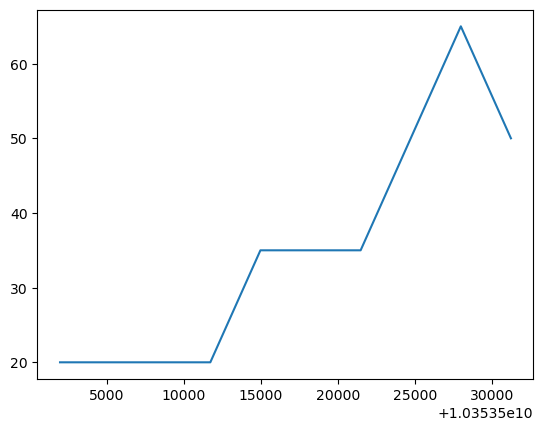

In [17]:
plt.plot(freq[range(150, 200,5)].values, muCI)